<a href="https://colab.research.google.com/github/dewoller/uofl_seminars/blob/main/lm_2_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palmer Penguins
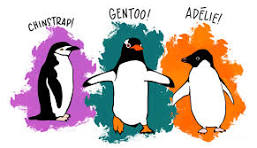




# Step 1: load (and install) packages

In [13]:
# Install packages if not already installed
#install.packages(c("tidymodels", "palmerpenguins"))

# Load necessary libraries
library(conflicted)
suppressWarnings(library(tidyverse))
library(tidymodels) # Loads the tidymodels framework for modeling and machine learning
library(palmerpenguins) # Loads the Palmer Penguins dataset
head(penguins)
cat('\n\n# Penguins summary\n')
summary(penguins)



species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007




# Penguins summary


      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

# Step 1a: visualise


> Indented block



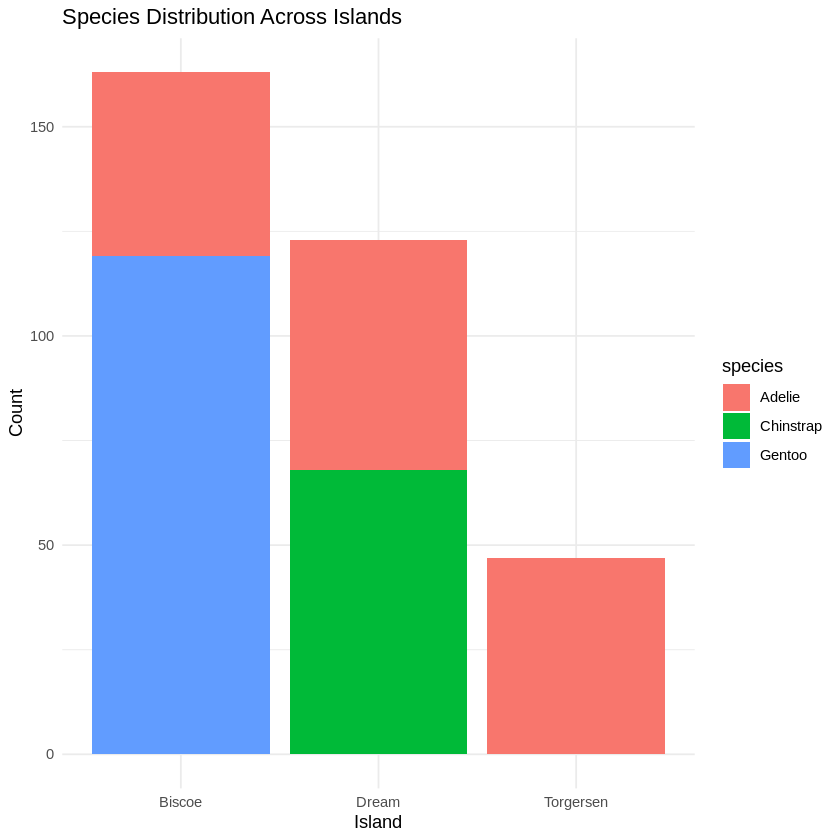

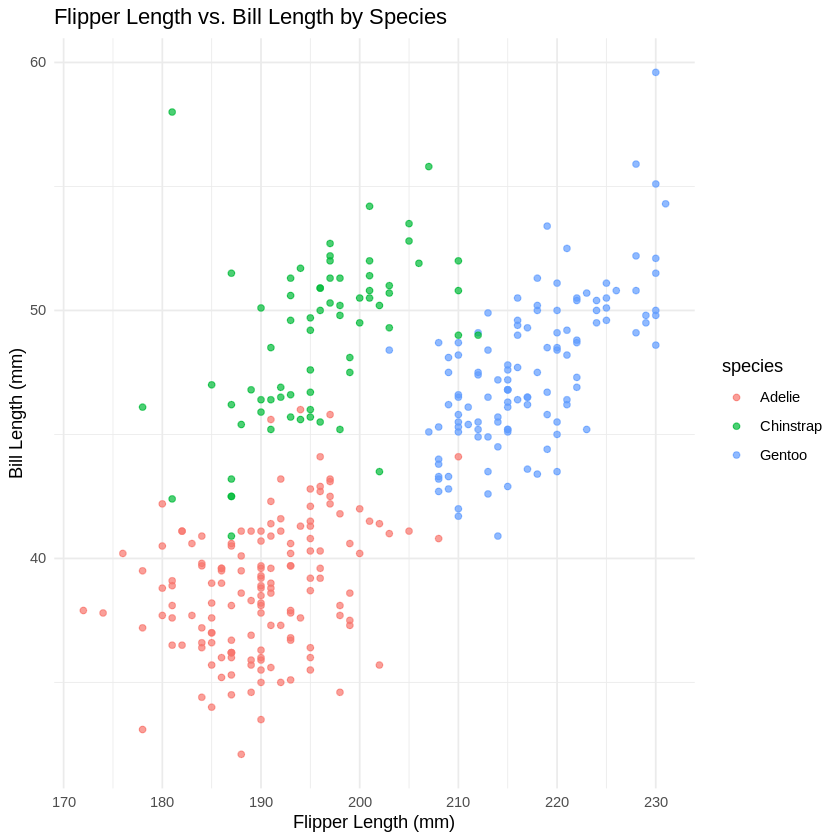

In [14]:
ggplot(penguins_clean, aes(x = island, fill = species)) +
  geom_bar() +
  labs(title = "Species Distribution Across Islands", x = "Island", y = "Count") +
  theme_minimal()

ggplot(penguins_clean, aes(x = flipper_length_mm, y = bill_length_mm, color = species)) +
  geom_point(alpha = 0.7) +
  labs(title = "Flipper Length vs. Bill Length by Species", x = "Flipper Length (mm)", y = "Bill Length (mm)") +
  theme_minimal()

# Step 2: Prepare the Data


In [22]:
# Load and preprocess the data. We'll remove missing values and split the data into training and testing sets.

# Load the data and remove missing values
data("penguins") # Loads the penguins dataset
penguins_clean <- drop_na(penguins) # Removes rows with any missing values

# Split the data into training and testing sets
set.seed(123) # Ensures reproducible results when splitting the data
split <- initial_split(penguins_clean, prop = 0.75) # Splits the data, with 75% for training
train_data <- training(split) # Extracts the training set
test_data <- testing(split) # Extracts the testing set

dim( train_data )
dim( test_data )

[1] 249   8

[1] 84  8

# Step 3: Create a Recipe


In [23]:
# A recipe specifies the preprocessing steps. For this example, we'll just deal with missing data, but typically, you could also specify steps for normalization, factor encoding, etc.

recipe <- recipe(species ~ ., data = train_data) %>%
  step_dummy(all_nominal(), -all_outcomes()) %>% # Converts all nominal variables to dummy variables, except the outcome variable
  step_zv(all_predictors()) %>% # eliminates zero variance predictors
  step_normalize(all_numeric(), -all_outcomes()) # Normalizes all numeric predictors, excluding the outcome variable

recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 7



── Operations 

• Dummy variables from: all_nominal() and -all_outcomes()

• Zero variance filter on: all_predictors()

• Centering and scaling for: all_numeric() and -all_outcomes()



# Step 4: Specify the Model


In [24]:
# For a multinomial classification problem, we can use a model like multinomial logistic regression. The tidymodels framework allows for easy specification of such models.

model_spec <- multinom_reg() %>%
  set_engine("nnet") %>%
  set_mode("classification") # Specifies a multinomial logistic regression model using the 'nnet' engine for classification


# to predict numbers (eg regression), using a linear model, use the following code:

# model_spec <- linear_reg() %>%
#  set_engine("lm") %>%
#  set_mode("regression") # Specifies a linear regression model using the 'lm' engine for regression

# Voila!

model_spec


Multinomial Regression Model Specification (classification)

Computational engine: nnet 


# Step 5: Bundle Preprocessing and Model in a Workflow


In [25]:
# A workflow in tidymodels bundles together your preprocessing steps and model.

workflow <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(model_spec) # Combines the preprocessing recipe and model specification into a workflow

workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Computational engine: nnet 


# Step 6: Fit the Model


In [28]:
# Fit the model to the training data using the workflow.

fitted_model <- workflow %>%
  fit(data = train_data) # Fits the specified model to the training data

fitted_model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, trace = FALSE)

Coefficients:
          (Intercept) bill_length_mm bill_depth_mm flipper_length_mm
Chinstrap   -7.550600       52.48168     -27.43394          6.129507
Gentoo      -1.287242       25.20023     -24.72126         16.545515
          body_mass_g      year island_Dream island_Torgersen  sex_male
Chinstrap   -8.956917 -2.480177    22.777059         2.957707 -2.348212
Gentoo       9.218064 -6.457503    -6.602666        -2.813130 -6.471485

Residual Deviance: 0.002728084 
AIC: 36.00273 

# Step 7: Evaluate the Model


In [29]:
# Predict on the test set and evaluate the model's performance.

results <- fitted_model %>%
  predict(new_data = test_data) %>%
  bind_cols(test_data) %>%
  metrics(truth = species, estimate = .pred_class) %>%
  select(.metric, .estimate) # Predicts species on the test data, binds predictions to true values, and calculates metrics

results

.metric,.estimate
<chr>,<dbl>
accuracy,1
kap,1


In [21]:
# View the results
# For a more detailed performance evaluation, confusion matrices or other classification metrics.

conf_mat <- fitted_model %>%
  predict(new_data = test_data) %>%
  bind_cols(test_data) %>%
  conf_mat(truth = species, estimate = .pred_class) # Generates a confusion matrix from predictions

conf_mat

           Truth
Prediction  Adelie Chinstrap Gentoo
  Adelie        37         0      0
  Chinstrap      0        21      0
  Gentoo         0         0     26

Confidence matrix